In [1]:
from train import train_model
import torch
import albumentations as A
from dataset import PlantDataset
from simple_cnn import SimpleCNN
import torch.nn as nn

In [2]:
transform = A.Compose([
    A.OneOf([
        A.HorizontalFlip(),
        A.VerticalFlip(),
    ], p=1),
    A.Rotate(limit=90, p=0.5),
])


trainset = PlantDataset('datasets/training_data_augmented.csv', 'images', transform=transform)
validset = PlantDataset('datasets/valid_data.csv', 'images')


In [3]:
from torchvision.models import resnet18
model = resnet18()
model.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

num_classes = 4
model.fc = nn.Sequential(
    nn.Dropout(0.6),  
    nn.Linear(model.fc.in_features, num_classes))

model = model.to('cuda')


In [4]:
# model = SimpleCNN()
# model = model.to('cuda')
# model

In [5]:
model(trainset[0][0].to('cuda').reshape(1, 3, 100 ,100))

tensor([[-0.5406,  1.2496, -0.5148, -0.0682]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [6]:
train_model(model, trainset, validset, batch_size=4, epochs=100, learning_rate=0.00005, model_name='resnet18_100x100_weight_decay=0.0001_100epoch_learning_rate=0.00005', weight_decay=0.0001)

Batch 364/365,Remaining: 0.00minEpoch 1, Training loss: 1.4474430393308537 Validation Loss: 1.2663070410490036
Epoch 1, Training Class 1: 0.35039371252059937, Class 2: 0.3175675570964813, Class 3: 0.2817955017089844, Class 4: 0.3083333373069763
Epoch 1, Validation Class 1: 0.5375000238418579, Class 2: 0.109375, Class 3: 0.4140625, Class 4: 0.44999998807907104
Epoch 1, Training Class 1: 0.269696980714798, Class 2: 0.39830508828163147, Class 3: 0.2846347689628601, Class 4: 0.2936508059501648
Epoch 1, Validation Class 1: 0.5180723071098328, Class 2: 0.5, Class 3: 0.5299999713897705, Class 4: 0.09473684430122375
Batch 364/365,Remaining: 0.00minEpoch 2, Training loss: 1.4630642840273032 Validation Loss: 1.233921649317219
Epoch 2, Training Class 1: 0.33211007714271545, Class 2: 0.3282172381877899, Class 3: 0.28143712878227234, Class 4: 0.29522430896759033
Epoch 2, Validation Class 1: 0.557823121547699, Class 2: 0.10784313827753067, Class 3: 0.4354838728904724, Class 4: 0.517241358757019
Epoc

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import DataLoader
import numpy as np

def test_report(model, dataloader):
    """Prints confusion matrix for testing dataset
    dataloader should be of batch_size=1."""

    y_pred = []
    y_test = []
    model.eval()
    with torch.no_grad():
        for data, label in dataloader:
            output = model(data)
            label = label.numpy()
            output = output.numpy()

          

            y_pred.append(np.argmax(output))
            y_test.append(np.argmax(label))
        print(y_pred)
        print(y_test)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

dataset = PlantDataset('datasets/testing_data.csv', 'images')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

test_report(model.to('cpu'), dataloader)

[2, 3, 3, 3, 0, 2, 2, 3, 0, 2, 2, 3, 2, 0, 3, 3, 2, 1, 2, 3, 2, 0, 0, 2, 0, 3, 0, 0, 2, 2, 2, 2, 2, 3, 0, 0, 2, 3, 3, 2, 2, 0, 0, 3, 0, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 2, 2, 3, 2, 3, 0, 2, 0, 2, 3, 2, 2, 2, 0, 3, 2, 3, 2, 2, 0, 1, 2, 2, 3, 0, 3, 0, 2, 3, 0, 3, 3, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 3, 0, 3, 3, 3, 0, 2, 3, 2, 2, 3, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 3, 2, 2, 2, 1, 0, 3, 2, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 2, 3, 0, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 2, 0, 2, 0, 3, 3, 3, 0, 2, 1, 2, 3, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 0, 1, 2, 2, 3, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 2, 2, 3, 0, 0, 1, 1, 3, 0, 3, 3, 0, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 3, 0, 2, 3, 0, 0, 0, 0, 2, 3, 0, 2, 3, 2, 3, 2, 1, 2, 0, 3, 3, 0, 2, 2, 0, 3, 2, 2, 2, 3, 1, 

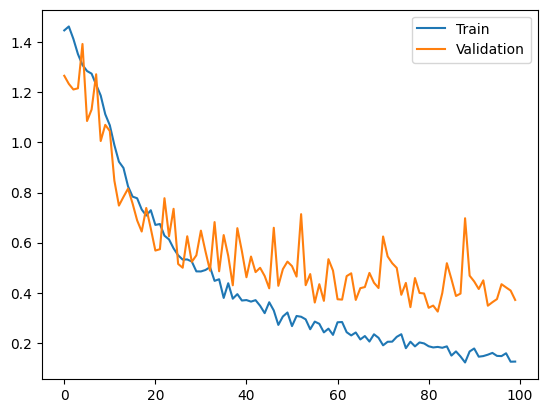

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/adam/Desktop/leaf classification project/results/resnet18_100x100_weight_decay=0.0001_100epoch_learning_rate=0.00005.csv')
plt.plot(df['loss'], label='Train')
plt.plot(df['val_loss'], label='Validation')
plt.legend()
plt.show()